## 🔄 Normalization

### 📌 What is Normalization?
- Normalization is a feature scaling technique that transforms features to a common scale, typically within [0, 1]. 
- This ensures that all features contribute equally to the model's training, especially when they have different units or ranges.

#### ✅ Why Use Normalization?
- Useful when features have different scales or units (e.g., age in years vs. salary in thousands).

- Essential for distance-based models like:

    - k-Nearest Neighbors (kNN)

    - Support Vector Machines (SVM)

    - Neural Networks

- Improves convergence during gradient descent optimization.

### 🔄 Normalization Techniques
Normalization scales features to ensure consistent influence across features during model training.

#### 1️⃣ Min-Max Scaling
Formula:

$x' = \frac{x-{x_{min}}}{{x_{max}}-{x_{min}}}$

- Scales data to range [0, 1]
- Very sensitive to outliers

#### 2️⃣ Mean Normalization
Formula:

$x' = \frac{x-{x_{mean}}}{{x_{max}}-{x_{min}}}$

- Centers data around 0
- Rarely used in practice
- Similar to Min-Max but mean-centered
- Still not robust to outliers

#### 3️⃣ Max Absolute Scaling
Formula:

$x' = \frac{x}{|x_{max}|}$

- Scales data in range [-1, 1]
- Good for sparse datasets
- Does not center the data
- Works well with linear models

#### 4️⃣ Robust Scaling
Formula:

$ x' = \frac{x-median}{IQR}$

- Uses median and IQR (Interquartile Range)
- When your data contains outliers
- Very robust to outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("wine_data.csv", header=None, usecols=[0, 1, 2], names=["Class label", "Alcohol", "Malic Acid"])
df.head()

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


Text(0.5, 1.0, 'Distribution of Alcohol and Malic Acid')

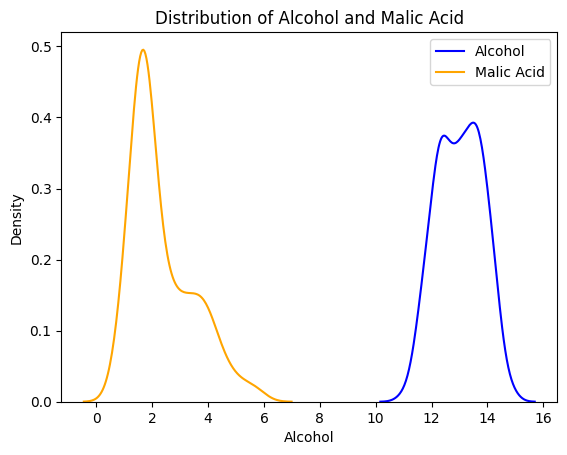

In [8]:
sns.kdeplot(df["Alcohol"], label="Alcohol", color="blue")
sns.kdeplot(df["Malic Acid"], label="Malic Acid", color="orange")
plt.legend()
plt.title("Distribution of Alcohol and Malic Acid")

In [10]:
df['Class label'].unique()

array([1, 2, 3])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

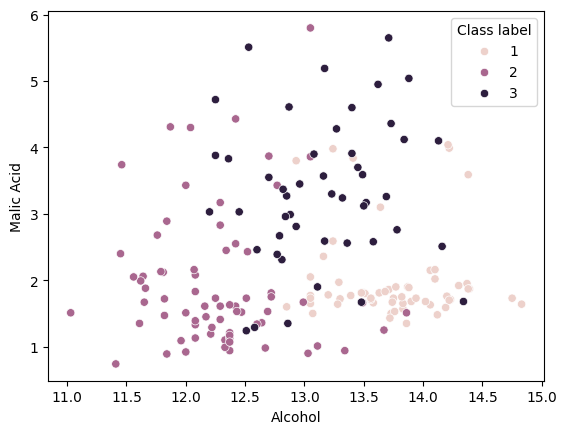

In [11]:
sns.scatterplot(x="Alcohol", y="Malic Acid", hue="Class label", data=df)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Alcohol', 'Malic Acid']], df['Class label'], test_size=0.2, random_state=0)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 2), (36, 2), (142,), (36,))

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

# transform test and train data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [17]:
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [18]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


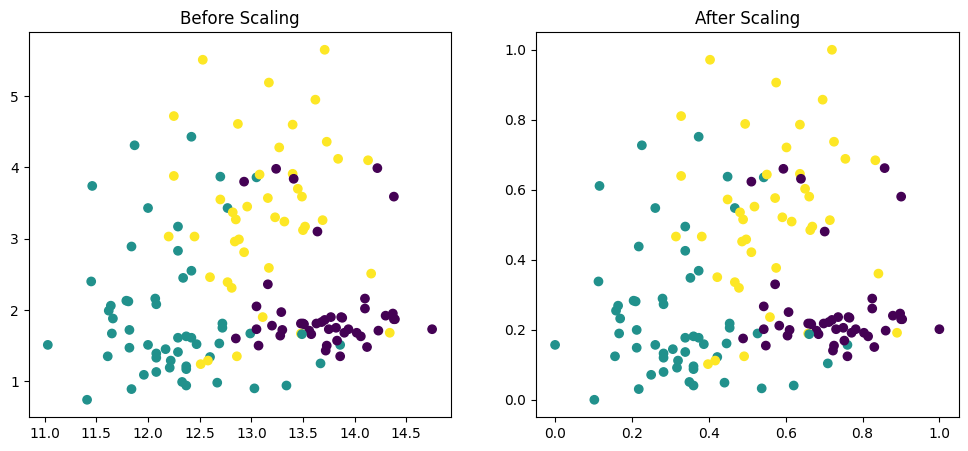

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

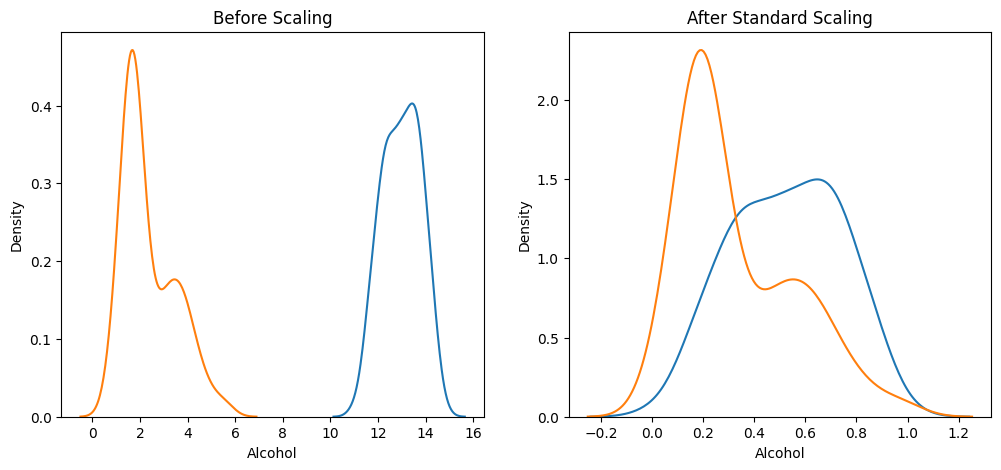

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

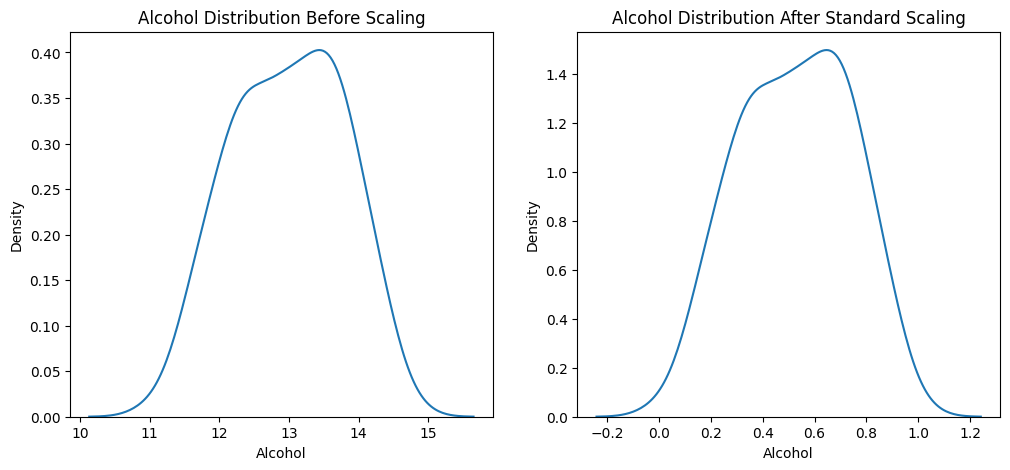

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

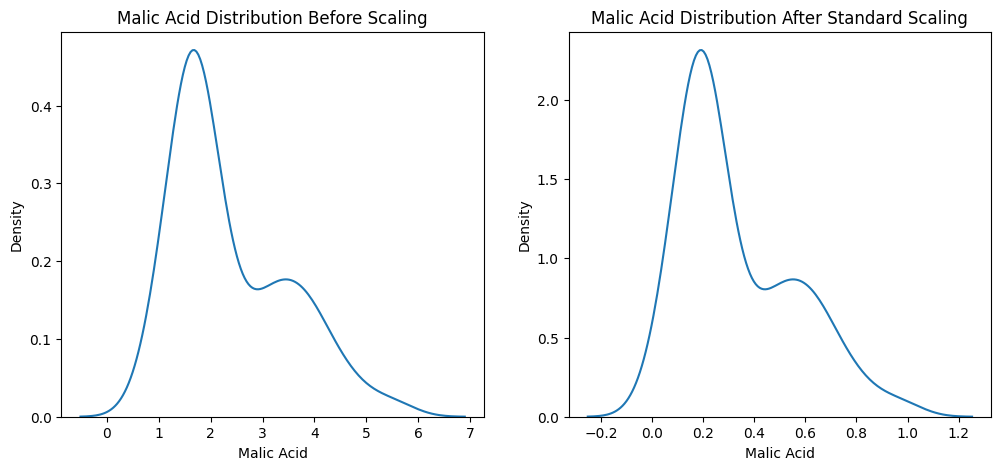

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic Acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Malic Acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()
